## Visualize MRI Brain Slices



In [12]:
import numpy as np
from nilearn.signal import clean
from utils import *
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
#Load in numpy data, 4d transposed image

img_4d = np.load('data/subject_10004_08693_4d.npy')
img_4d.shape

(79, 95, 79, 144)

plotting layer 31 at time point 139 of Image


(-0.5, 94.5, 78.5, -0.5)

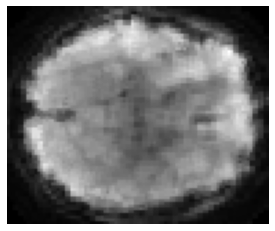

In [38]:
# Visualize a layer of the image

maxval = 94

layer = np.random.randint(0, maxval)

time_point = 139
print(f"plotting layer {layer} at time point {time_point} of Image")
plt.imshow(img_4d[:,:,layer, time_point], cmap = 'gray')
plt.axis('off')

In [70]:
# Visualize all the layers of the brain at a specific time point
time_point = 139

def explore_4d_img(layer):
    plt.figure(figsize = (10, 5))
    plt.imshow(img_4d[:, :, layer, time_point], cmap = 'gray')
    plt.title("Layers of the brain")
    plt.axis('off')
    return layer

# Call interactive component of function above at time point 139 
interact(explore_4d_img, layer = (0, img_4d.shape[2] - 1))
plt.show()

interactive(children=(IntSlider(value=39, description='layer', max=78), Output()), _dom_classes=('widget-inter…

## Visualize voxel distributions

In [2]:
# visualize mask image
#Load in numpy data
masked_2d = np.load('data/mask_single_sub.npy')
masked_2d.shape

(84, 237979)

In [55]:
path = "data/data_path_dictionary.pkl"
data_path_dictionary = open_pickle(path)
label_path = data_path_dictionary['labels'][0]
# rt_labels
bool_mat = True
label_data = access_load_data(label_path, bool_mat)

In [18]:
all_labels = np.load('data/rt_label.npy')
label_ids = np.where(all_labels!=9999)
labels = all_labels[label_ids]

In [3]:
masked_norm_2d = clean(masked_2d,
                       #detrend = settings.detrend,
                       standardize = 'psc'
                       #confounds=confound_signals.values,
                       #low_pass=settings.low_pass,
                       #high_pass=settings.high_pass,
                       #t_r=settings.func.tr)
                      )
masked_norm_2d

/Users/staceyrivet/Library/Python/3.7/lib/python/site-packages/nilearn/signal.py:83: RuntimeWarning: invalid value encountered in true_divide
  signals = (signals - mean_signal) / np.absolute(mean_signal)
/Users/staceyrivet/Library/Python/3.7/lib/python/site-packages/nilearn/signal.py:87: UserWarning: psc standardization strategy is meaningless for features that have a mean of 0. These time series are set to 0.
  warnings.warn('psc standardization strategy is meaningless '


array([[ 0.       ,  0.       ,  0.       , ...,  3.4595332, -2.7081203,
        -4.08065  ],
       [ 0.       ,  0.       ,  0.       , ...,  3.0718458, -2.8591168,
        -2.5701163],
       [ 0.       ,  0.       ,  0.       , ...,  1.8663439, -4.98893  ,
        -3.2585096],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  3.3766582,  4.5196137,
         6.078048 ],
       [ 0.       ,  0.       ,  0.       , ..., -2.0088224, -1.2887629,
        -3.3319068],
       [ 0.       ,  0.       ,  0.       , ...,  1.0262262, -3.976704 ,
        -2.5131683]], dtype=float32)

In [4]:
masked_norm_2d.shape

(84, 237979)

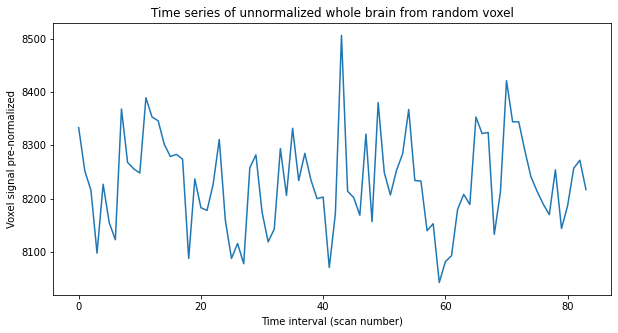

In [20]:
# Plot time series of brain data from a random voxel pre-normalization
voxel = np.random.randint(0, masked_2d.shape[1])
plt.figure(figsize = (10 ,5))
plt.plot(masked_2d[:, voxel])
plt.title("Time series of unnormalized whole brain from random voxel")
plt.xlabel("Time interval (scan number)")
plt.ylabel("Voxel signal pre-normalized")
plt.show()

166633
x 22
y 19
z 22
0.6123501450937399
[ 1.13139069  0.94209492  0.09537245  0.31304517 -1.03456306 -0.78558457
 -0.23607098  0.70163989  0.68765014  0.91158402  2.04339051  1.63494837
 -0.67061543  0.25456703  0.24057727  0.44573382 -0.66395688 -1.57955194
 -1.35561192 -0.04849944 -1.59020925 -1.309919    0.02849923  0.33382803
 -0.4314934   1.40155554  1.30617082  0.25283667 -1.43287969 -0.82074851
 -0.1147062   0.38471821 -0.64357144 -0.29441458 -0.60893947  0.27868223
 -0.51795107  0.13800207 -0.33930653  0.26655737 -0.21075734 -1.0324291
 -0.6707499   0.37966159 -0.95543039 -0.59375131 -1.13367128 -1.04122162
 -1.62497568  0.59627044  0.15652259  0.74986422  1.45591259  1.45444512
  0.32597104  0.19928671 -0.34063947  0.03356807  0.10097323 -1.39690864
 -0.10231229 -0.78624487  0.24537708  0.18130426  0.04209154  1.37424862
  0.42109281  0.23179089  0.07379472  0.58574748  2.00556064  0.58907378
  1.14485466  1.02442527  1.16697037  0.31398678  0.66940475 -0.12722236
 -0.7047154

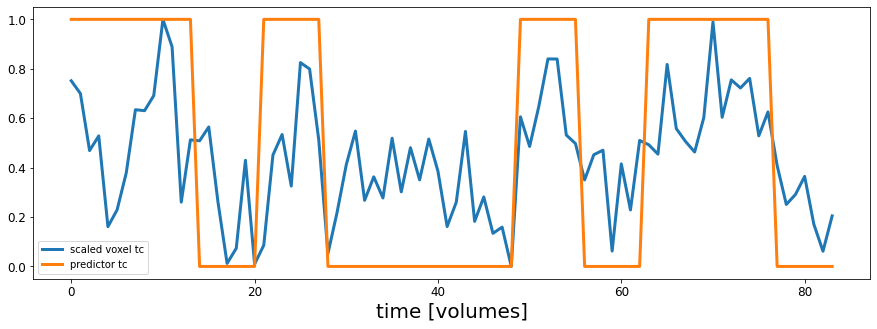

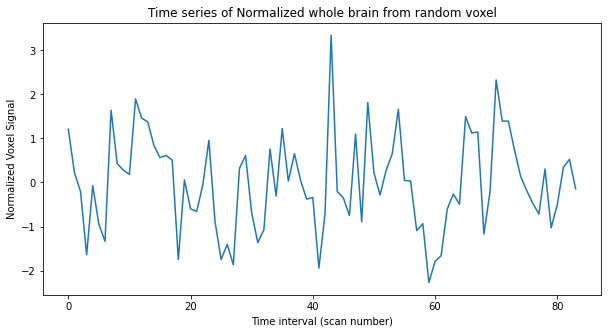

In [135]:
# Plot time series of brain data from a random voxel after normalization
plt.figure(figsize = (10 ,5))
plt.plot(masked_norm_2d[:, voxel])
plt.title("Time series of Normalized whole brain from random voxel")
plt.xlabel("Time interval (scan number)")
plt.ylabel("Normalized Voxel Signal")
plt.show()

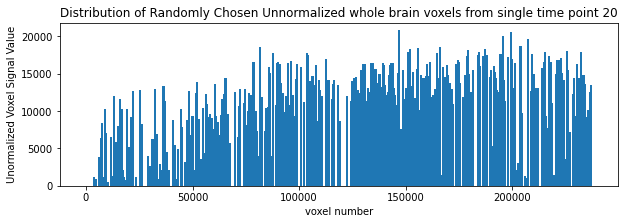

In [65]:
# Plot Unnormalized distribution of voxels at random time point
tp = np.random.randint(0, masked_2d.shape[0])
x_ax = np.sort(np.random.randint(0, len(masked_2d[tp, :]), 500))
y_ax = masked_2d[tp, x_ax]
plt.figure(figsize = (10 ,3))
plt.bar(x_ax, y_ax, width=1000)
plt.title(f"Distribution of Randomly Chosen Unnormalized whole brain voxels from single time point {tp}")
plt.xlabel("voxel number")
plt.ylabel("Unormalized Voxel Signal Value")
plt.show()

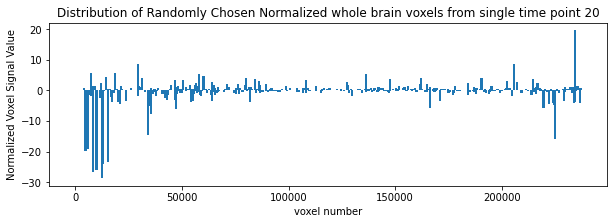

In [66]:
# Plot Normalized voxel distribution at random time point
y_ax = masked_norm_2d[tp, x_ax]
plt.figure(figsize = (10 ,3))
plt.bar(x_ax, y_ax, width=1000)
plt.title(f"Distribution of Randomly Chosen Normalized whole brain voxels from single time point {tp}")
plt.xlabel("voxel number")
plt.ylabel("Normalized Voxel Signal Value")
plt.show()

### Plot the correlation time series against labels
- on masked PSC data, min-max scaled 


mask shape: (79, 95, 79)


0it [00:00, ?it/s]/Users/staceyrivet/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
7023it [00:00, 36296.33it/s]

doing lots of correlation calculations...


237979it [00:13, 18156.64it/s]


finished with correlations
166633
x 22
y 19
z 22
0.6157986744611266
[ 1.13139069  0.94209492  0.09537245  0.31304517 -1.03456306 -0.78558457
 -0.23607098  0.70163989  0.68765014  0.91158402  2.04339051  1.63494837
 -0.67061543  0.25456703  0.24057727  0.44573382 -0.66395688 -1.57955194
 -1.35561192 -0.04849944 -1.59020925 -1.309919    0.02849923  0.33382803
 -0.4314934   1.40155554  1.30617082  0.25283667 -1.43287969 -0.82074851
 -0.1147062   0.38471821 -0.64357144 -0.29441458 -0.60893947  0.27868223
 -0.51795107  0.13800207 -0.33930653  0.26655737 -0.21075734 -1.0324291
 -0.6707499   0.37966159 -0.95543039 -0.59375131 -1.13367128 -1.04122162
 -1.62497568  0.59627044  0.15652259  0.74986422  1.45591259  1.45444512
  0.32597104  0.19928671 -0.34063947  0.03356807  0.10097323 -1.39690864
 -0.10231229 -0.78624487  0.24537708  0.18130426  0.04209154  1.37424862
  0.42109281  0.23179089  0.07379472  0.58574748  2.00556064  0.58907378
  1.14485466  1.02442527  1.16697037  0.31398678  0.66940

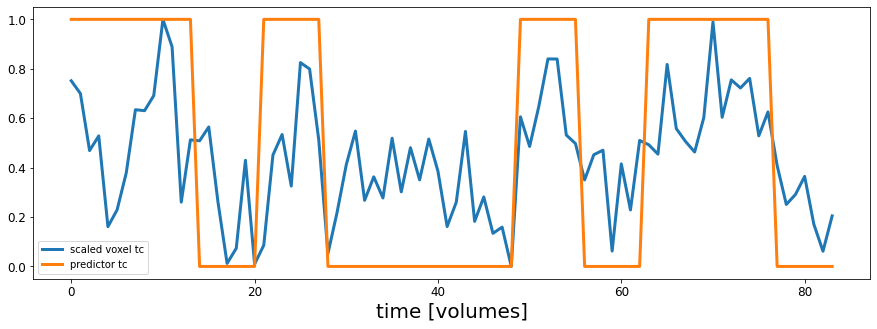

In [136]:
new_masked = masked_norm_2d.T
mask_data_path = data_path_dictionary['mask_data'][0]
mask_type_dict = access_load_data(mask_data_path,True)
np_array_mask = mask_type_dict['mask']
print("mask shape:", np_array_mask.shape)

indices_mask = np.where(np_array_mask==1) # gets the indices where the mask is 1, the brain region for x, y, z planes
fake_4d = np.zeros((79,95,79,84))
#mat_4d[indices_mask] = r_matrix
fake_4d.shape

for ind in range(0,len(labels)):
    fake_4d[indices_mask[0], indices_mask[1], indices_mask[2], ind] = new_masked[:,ind]
    
r_matrix = np.zeros((79,95,79))
p_matrix = np.zeros((79,95,79))

from scipy import stats
r_values = []
p_values = []

# loop over every timeseries in our data
print('doing lots of correlation calculations...')
for idx, val in tqdm.tqdm(enumerate(range(0,new_masked.shape[0]))):
    r,p = stats.pearsonr(labels, new_masked[idx,:])
    r_values.append(r)
    p_values.append(p)
print('finished with correlations')
    
# The r and p values are stored in 1d arrays (n voxels). Reshape back into a 3D array for visualization
r_matrix[indices_mask] = r_values
p_matrix[indices_mask] = p_values 


#indices = np.isnan(r_values)
#r_values[indices] = 0
for ind, i in enumerate(r_values):
    if np.isnan(i):
        r_values[ind] = 0
        

r_matrix[indices_mask] = r_values 


# Find the index position of the maximum value in the r_value array
max_idx = r_matrix.argmax()
print(max_idx)
# argmax returns the linear index, so turn into x/y/z index values
max_x, max_y, max_z = np.unravel_index(max_idx, r_matrix.shape)
print("x", max_x)
print("y", max_y)
print("z", max_z)
print(r_matrix[max_x, max_y, max_z])
# use the max_x, _y, and _z indices to get the timecourse of the best correlated voxel
max_corr_timecourse = fake_4d[max_x, max_y,max_z,:]
print(max_corr_timecourse)
# Define the min-max scaling function to put the voxel timecourse and predictor timecourse on the same slace
def scale(data):
    return (data - data.min()) / (data.max() - data.min())

# Create the plots
fig, ax = plt.subplots(1,1,figsize=(15, 5))
ax.plot(scale(max_corr_timecourse), lw=3, label='scaled voxel tc')
ax.plot(labels, lw=3, label='predictor tc')
#ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.tick_params(labelsize=12)
ax.legend()
plt.show()